In [ ]:
!pip install transformers[torch]
!pip install accelerate -U
!pip install evaluate

In [ ]:
#libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install evaluate
import evaluate
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding
from datasets import load_dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 26.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
df = pd.read_csv("/content/Feedback.csv",encoding="utf-8")
df.head(30)

,text,sentiment
0,You have selected some technologies for the as...,Critical
1,The work lacks novelty and presentation,Critical
2,This work does not reflect an understanding of...,Critical
3,"Learning is never done without error, so you s...",Critical
4,I would have implemented the method using this...,Critical
5,Need to improve,Critical
6,"To be honest, this report is far behind my exp...",Critical
7,The report misses critical discussion and inte...,Critical
8,You missed to integrate technology in your ass...,Critical
9,I respect your effort to fulfill the assignmen...,Critical


In [ ]:
#Summary of the dataset
df.describe()

,text,sentiment
count,33,33
unique,33,3
top,You have selected some technologies for the as...,Critical
freq,1,11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       33 non-null     object
 1   sentiment  33 non-null     object
dtypes: object(2)
memory usage: 656.0+ bytes


In [ ]:
df.dtypes

text         object
sentiment    object
dtype: object

In [ ]:
#sentiment count
df['sentiment'].value_counts()

sentiment
Critical        11
Neutral         11
Encouraging     11
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

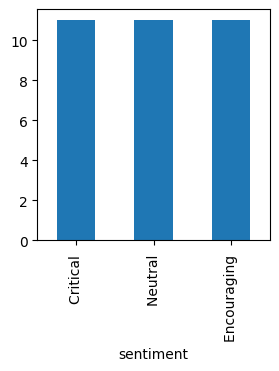

In [ ]:
df.sentiment.value_counts().plot(kind='bar', figsize=(3,3))

In [ ]:
df.isna().sum().any()

False

In [ ]:
df.isna().sum()

text         0
sentiment    0
dtype: int64

In [ ]:
# Get the lists of sentences and their labels.
sentences = df.text.values
labels = df.sentiment.values

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  You have selected some technologies for the assessment but the assessment objective was to see how you can describe or justify each chosen technology. So you have failed to fulfil this objective.
Tokenized:  ['you', 'have', 'selected', 'some', 'technologies', 'for', 'the', 'assessment', 'but', 'the', 'assessment', 'objective', 'was', 'to', 'see', 'how', 'you', 'can', 'describe', 'or', 'justify', 'each', 'chosen', 'technology', '.', 'so', 'you', 'have', 'failed', 'to', 'fu', '##lf', '##il', 'this', 'objective', '.']
Token IDs:  [2017, 2031, 3479, 2070, 6786, 2005, 1996, 7667, 2021, 1996, 7667, 7863, 2001, 2000, 2156, 2129, 2017, 2064, 6235, 2030, 16114, 2169, 4217, 2974, 1012, 2061, 2017, 2031, 3478, 2000, 11865, 10270, 4014, 2023, 7863, 1012]


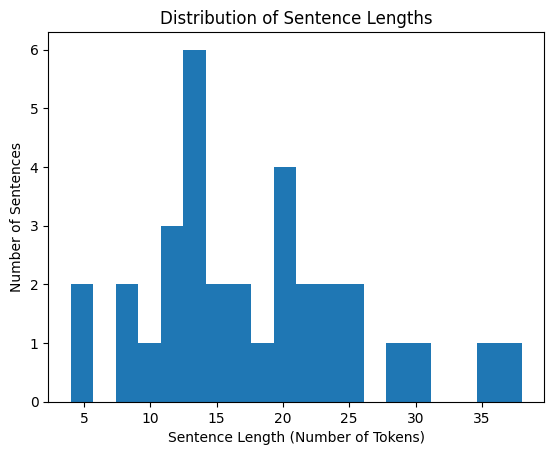

Max sentence length:  38


In [ ]:
import matplotlib.pyplot as plt

max_len = 0
sentence_lengths = []  # List to store sentence lengths

# For every sentence...
for sent in sentences:

  # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
  input_ids = tokenizer.encode(sent, add_special_tokens=True)

  # Update the maximum sentence length.
  max_len = max(max_len, len(input_ids))

  # Store sentence length
  sentence_lengths.append(len(input_ids))

# Plot the distribution of sentence lengths
plt.hist(sentence_lengths, bins=20)
plt.xlabel("Sentence Length (Number of Tokens)")
plt.ylabel("Number of Sentences")
plt.title("Distribution of Sentence Lengths")
plt.show()

print('Max sentence length: ', max_len)



In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])


# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  You have selected some technologies for the assessment but the assessment objective was to see how you can describe or justify each chosen technology. So you have failed to fulfil this objective.
Token IDs: tensor([[  101,  2017,  2031,  3479,  2070,  6786,  2005,  1996,  7667,  2021,
          1996,  7667,  7863,  2001,  2000,  2156,  2129,  2017,  2064,  6235,
          2030, 16114,  2169,  4217,  2974,  1012,  2061,  2017,  2031,  3478,
          2000, 11865, 10270,  4014,  2023,  7863,  1012,   102,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0]])


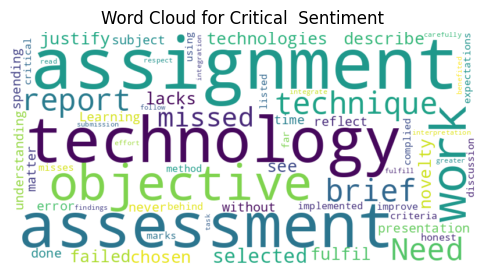

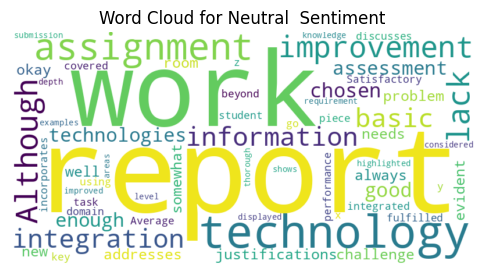

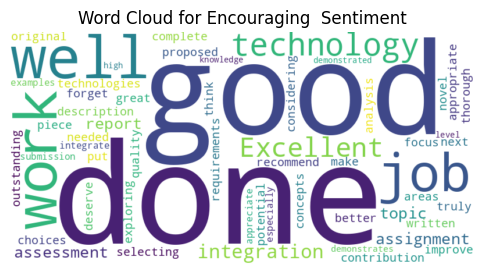

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word clouds for each sentiment category
for sentiment_label in df['sentiment'].unique():
    # Filter text data for the current sentiment label
    text_data = ' '.join(df[df['sentiment'] == sentiment_label]['text'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    # Plot the word cloud
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {sentiment_label} Sentiment")
    plt.axis('off')
    plt.show()


In [ ]:
# Define a dictionary mapping sentiment labels to numeric values
sentiment_mapping = {
    "Neutral": 0,
    "Critical": 1,
    "Encouraging": 2
}

# Remove leading and trailing whitespace from sentiment values
df["sentiment"] = df["sentiment"].str.strip()

# Apply the mapping to the sentiment column
df["sentiment"] = df["sentiment"].map(sentiment_mapping)

# Print the DataFrame to verify the conversion
print(df)


                                                 text  sentiment
0   You have selected some technologies for the as...          1
1            The work lacks novelty and presentation           1
2   This work does not reflect an understanding of...          1
3   Learning is never done without error, so you s...          1
4   I would have implemented the method using this...          1
5                                     Need to improve          1
6   To be honest, this report is far behind my exp...          1
7   The report misses critical discussion and inte...          1
8   You missed to integrate technology in your ass...          1
9   I respect your effort to fulfill the assignmen...          1
10  This submission would have benefited from grea...          1
11  Although,  you have chosen good technologies f...          0
12  The work addresses challenge of the new problem.           0
13  Your work is somewhat okay, but it needs impro...          0
14  You are doing well, b

In [ ]:
#splitting datset
train, test = train_test_split(df, test_size=0.2, random_state=42)
train,valid = train_test_split(train,test_size = 0.25, random_state = 42)

train.to_csv("train.csv", index=False)
test.to_csv("test.csv",index =False)
valid.to_csv("valid.csv",index =False)

In [ ]:
# import data set in DatasetDict format
df_train= load_dataset("csv", data_files="train.csv",split = "train")
df_test = load_dataset("csv", data_files="test.csv", split = "train")
df_valid = load_dataset("csv", data_files= "valid.csv", split = "train")
print(df_train)

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['text', 'sentiment'],
    num_rows: 19
})


In [ ]:
# ------- encoding with Bert tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
train_tokenized = df_train.map(lambda batch: tokenizer(batch['text'], padding='max_length', truncation=True, max_length=32))
test_tokenized = df_test.map(lambda batch: tokenizer(batch['text'], padding='max_length', truncation=True, max_length=32))
valid_tokenized = df_valid.map(lambda batch: tokenizer(batch["text"], padding='max_length', truncation=True, max_length = 32))

train_tokenized = train_tokenized.rename_column("sentiment", "labels")
test_tokenized = test_tokenized.rename_column("sentiment", "labels")
valid_tokenized = valid_tokenized.rename_column("sentiment", "labels")

train_tokenized.set_format("torch", columns=["input_ids", "token_type_ids", "attention_mask", "labels"])
test_tokenized.set_format("torch", columns=["input_ids", "token_type_ids", "attention_mask", "labels"])
valid_tokenized.set_format("torch", columns=["input_ids", "token_type_ids", "attention_mask", "labels"])


train_tokenized.save_to_disk("train_tokenized")
valid_tokenized.save_to_disk("valid_tokenized")
test_tokenized.save_to_disk("test_tokenized")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/19 [00:00<?, ? examples/s]

Map:   0%|          | 0/7 [00:00<?, ? examples/s]

Map:   0%|          | 0/7 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/19 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/7 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/7 [00:00<?, ? examples/s]

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# dynmaic padding
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


In [ ]:
training_args = TrainingArguments(
    output_dir='path/Sentiment',          # output directory
    num_train_epochs=10,              # total number of training epochs
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=0,
    learning_rate=5e-5,
    logging_dir='./logs',
    logging_steps=1000,
)

metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)


In [ ]:
trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=train_tokenized,
   eval_dataset=valid_tokenized,
   tokenizer=tokenizer,
   compute_metrics=compute_metrics,
)

trainer.train()


Step,Training Loss


TrainOutput(global_step=20, training_loss=0.728545093536377, metrics={'train_runtime': 89.5953, 'train_samples_per_second': 2.121, 'train_steps_per_second': 0.223, 'total_flos': 3124471835520.0, 'train_loss': 0.728545093536377, 'epoch': 10.0})

In [ ]:
#----------- save the fine-tuned model
from transformers import WEIGHTS_NAME, CONFIG_NAME
output_dir = "path/sentiment"
model_to_save = model.module if hasattr(model, 'module') else model



In [ ]:
import os
import torch

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the fine-tuned model
output_model_file = os.path.join(output_dir, WEIGHTS_NAME)
output_config_file = os.path.join(output_dir, CONFIG_NAME)

torch.save(model_to_save.state_dict(), output_model_file)
model_to_save.config.to_json_file(output_config_file)
tokenizer.save_vocabulary(output_dir)


('path/sentiment/vocab.txt',)

In [ ]:
# --------- reload the model
output_dir = "path/sentiment"
model = BertForSequenceClassification.from_pretrained(output_dir)
tokenizer = BertTokenizer.from_pretrained(output_dir)

In [ ]:
# ---------  get prediction for test data set
pred = trainer.predict(test_tokenized) # get prediction output
prediction = pred[0].argmax(axis=1) # transform logits to compare with the original label
original = pred[1]
accuracy = evaluate.load('accuracy')
f1 = evaluate.load('f1')
accuracy.compute(predictions=prediction, references=original) # 0.714
f1.compute(predictions=prediction, references=original, average='weighted') # 0.714

{'f1': 0.3333333333333333}

In [ ]:
# Get prediction for test data set
pred = trainer.predict(test_tokenized) # get prediction output
prediction = pred[0].argmax(axis=1) # transform logits to compare with the original label
original = pred[1]

# Load evaluation metrics
accuracy = evaluate.load('accuracy')
f1 = evaluate.load('f1')

# Compute accuracy and print
accuracy_score = accuracy.compute(predictions=prediction, references=original)
print("Accuracy:", accuracy_score)

# Compute F1 score and print
f1_score = f1.compute(predictions=prediction, references=original, average='weighted')
print("F1 Score:", f1_score)

from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Get prediction for test data set
pred = trainer.predict(test_tokenized)
prediction = pred[0].argmax(axis=1)
original = pred[1]

# Compute precision
precision = precision_score(original, prediction, average='weighted')

# Compute recall
recall = recall_score(original, prediction, average='weighted')

# Compute confusion matrix
conf_matrix = confusion_matrix(original, prediction)

# Calculate specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: {'accuracy': 0.42857142857142855}
F1 Score: {'f1': 0.3333333333333333}


Precision: 0.38095238095238093
Recall: 0.42857142857142855
Specificity: 0.0
Confusion Matrix:
[[0 3 0]
 [0 2 0]
 [0 1 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'F1 Score'),
  Text(2, 0, 'Precision'),
  Text(3, 0, 'Recall'),
  Text(4, 0, 'Specificity')])

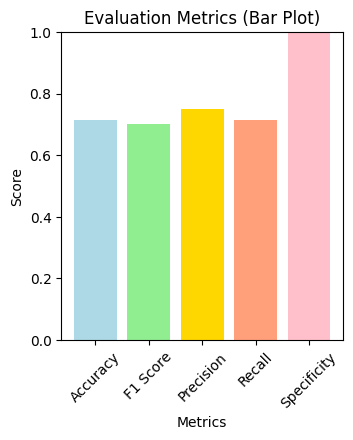

In [ ]:
import matplotlib.pyplot as plt

# Metrics
accuracy = 0.7142857142857143
f1_score = 0.7006802721088434
precision = 0.75
recall = 0.7142857142857143
specificity = 1.0

# Labels
labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity']

# Values
values = [accuracy, f1_score, precision, recall, specificity]

# Bar plot
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(labels, values, color=['#ADD8E6', '#90EE90', '#FFD700', '#FFA07A', '#FFC0CB'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics (Bar Plot)')
plt.ylim(0, 1)  # Set y-axis limit to ensure appropriate scale
plt.xticks(rotation=45)  # Rotate labels for better visibility


In [ ]:
# Load the trained model and tokenizer
output_dir = "path/sentiment"
model = BertForSequenceClassification.from_pretrained(output_dir)
tokenizer = BertTokenizer.from_pretrained(output_dir)

# Sample test texts
sample_texts = ["Great effort on your assignment! You've demonstrated a clear understanding of the topic and provided insightful analysis.",
                "Your work lacks depth and fails to address key aspects of the topic. Improvement is needed to meet the assignment requirements.",
                "Your assignment meets the basic expectations but could benefit from further elaboration and critical analysis.",
                "To be honest, this report is far behind my expectations. You have not complied with the criteria listed in the assessment brief and missed marks.",
                "Although,  you have chosen good technologies for the assessment but lack of enough justifications is evident",
                " You have done a good job by selecting appropriate technologies to complete the assessment. well done.",
                "The work lacks novelty and presentation ",
                "Your report shows a basic level of knowledge. There are some areas I have highlighted in your report which can be improved."

]

# Preprocess sample examples
tokenized_samples = tokenizer(sample_texts, padding='max_length', truncation=True, max_length=32, return_tensors='pt')

# Predict sentiment for sample examples
with torch.no_grad():
    outputs = model(**tokenized_samples)

# Convert logits to predictions
predictions = np.argmax(outputs.logits, axis=1)

# Print predictions
for text, prediction in zip(sample_texts, predictions):
    print(f"Text: {text}\nPredicted Sentiment: {prediction}")


Text: Great effort on your assignment! You've demonstrated a clear understanding of the topic and provided insightful analysis.
Predicted Sentiment: 2
Text: Your work lacks depth and fails to address key aspects of the topic. Improvement is needed to meet the assignment requirements.
Predicted Sentiment: 1
Text: Your assignment meets the basic expectations but could benefit from further elaboration and critical analysis.
Predicted Sentiment: 1
Text: To be honest, this report is far behind my expectations. You have not complied with the criteria listed in the assessment brief and missed marks.
Predicted Sentiment: 1
Text: Although,  you have chosen good technologies for the assessment but lack of enough justifications is evident
Predicted Sentiment: 0
Text:  You have done a good job by selecting appropriate technologies to complete the assessment. well done.
Predicted Sentiment: 2
Text: The work lacks novelty and presentation 
Predicted Sentiment: 1
Text: Your report shows a basic level